In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#simulate data 
np.random.seed(42)
data=pd.DataFrame({
    'maths': np.random.randint(40,100,100),
    'science':np.random.randint(35,95,100),
    'english':np.random.randint(50,100,100)
})
#print(data)

    maths  science  english
0      78       48       56
1      91       57       71
2      68       94       77
3      54       91       51
4      82       74       91
..    ...      ...      ...
95     53       77       67
96     70       63       89
97     87       70       50
98     54       47       60
99     47       66       77

[100 rows x 3 columns]


In [5]:
#use case : finding out average and below average students
"""
Labels:
Above Average:1
Below Average:0
"""
#calculate average
data['average']=data[['maths','science','english']].mean(axis=1)
print(data)

data['result']=data['average'].apply(lambda x:1 if x>=60 else 0)
print(data)

    maths  science  english    average  result
0      78       48       56  60.666667       1
1      91       57       71  73.000000       1
2      68       94       77  79.666667       1
3      54       91       51  65.333333       1
4      82       74       91  82.333333       1
..    ...      ...      ...        ...     ...
95     53       77       67  65.666667       1
96     70       63       89  74.000000       1
97     87       70       50  69.000000       1
98     54       47       60  53.666667       0
99     47       66       77  63.333333       1

[100 rows x 5 columns]
    maths  science  english    average  result
0      78       48       56  60.666667       1
1      91       57       71  73.000000       1
2      68       94       77  79.666667       1
3      54       91       51  65.333333       1
4      82       74       91  82.333333       1
..    ...      ...      ...        ...     ...
95     53       77       67  65.666667       1
96     70       63       89  74.0000

In [ ]:
# identify independent and dependent variables
X=data[['maths','science','english']]
y=data['result']
# split the data as train and test
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# train  and fit model
model=LogisticRegression()
model.fit(X_train,y_train)

# predict values for the first 5 students
averages=X_test.mean(axis=1)
predictions=model.predict(X_test)
# print(averages)
# print(predictions)

#error
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)



MSE: 0.0
MAE: 0.0
RMSE: 0.0


In [16]:
# predict new student
new_student=pd.DataFrame({
    'maths':[85],
    'science':[70],
    'english':[80]
})
probability=model.predict_proba(new_student)
print('Probability of new student',probability[0][1])
prediction=model.predict(new_student)
print('Predicted Result:', prediction[0])

Probability of new student 1.0
Predicted Result: 1


c:\Users\A C E R\Desktop\DS\broadwayenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


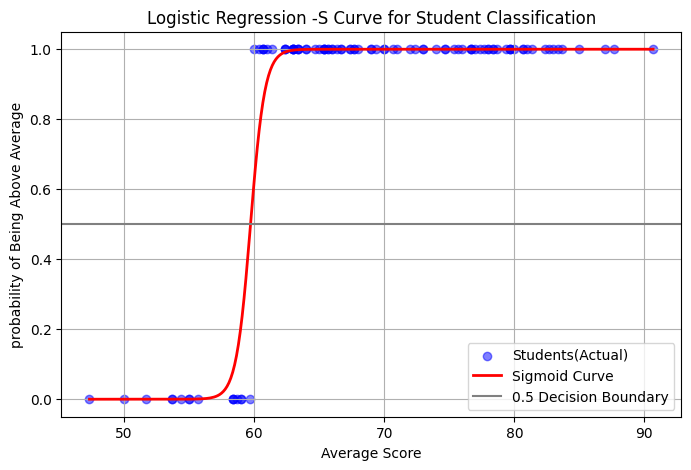

In [23]:
# visualization
import matplotlib.pyplot as plt
# for simplicity, we are using average as single input
X_avg=data[['average']]
y=data['result']
model_avg=LogisticRegression()
model_avg.fit(X_avg,y)

# x_test_vals
X_test_vals=np.linspace(X_avg.min(),X_avg.max(),300)
y_probs=model_avg.predict_proba(X_test_vals)[:,1]
plt.figure(figsize=(8,5))
plt.scatter(X_avg,y,color='blue',label='Students(Actual)', alpha=0.5)
plt.plot(X_test_vals,y_probs,color='red', linewidth=2, label='Sigmoid Curve')
plt.axhline(y=0.5,color='grey',label='0.5 Decision Boundary')

plt.title('Logistic Regression -S Curve for Student Classification')
plt.xlabel('Average Score')
plt.ylabel('probability of Being Above Average')
plt.legend()
plt.grid(True)
plt.show()
